In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

In [2]:
df = pd.read_csv("/Users/zain/Downloads/YouTube-Spam-Collection-v1/Youtube04-Eminem.csv")

In [3]:
df.head(10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
5,z133yfmjdur4dvyjr04ceh2osl2fvngrqi4,Darrion Johnson,2015-05-29T01:27:30.360000,Wow this video almost has a billion views! Did...,0
6,z12zgrw5furdsn0sc233hfwavnznyhicq,kyeman13,NaN,Go check out my rapping video called Four Whee...,1
7,z12vxdzzds2kzzrzq04cdjc4ozq2szuyl5o,Damax,2015-05-29T00:41:22.426000,Almost 1 billion﻿,0
8,z12gxdortqzwhhqas04cfjrwituzghb5tvk0k,Muhammad Asim Mansha,NaN,Aslamu Lykum... From Pakistan﻿,1
9,z132wd4ywmicxj2gn04cdfhilyryjhmjhk00k,JuanPa Rap,2015-05-28T23:23:41.231000,Eminem is idol for very people in España and M...,0


In [4]:
len(df.loc[(df['CLASS'] == 1)]), len(df.loc[(df['CLASS'] == 0)])

(245, 203)

In [7]:
196/245 * 100, 163/203 *100, 196+160

(80.0, 80.29556650246306, 356)

In [8]:
vectorizer = TfidfVectorizer()

train_set = pd.concat([df.loc[(df['CLASS'] == 1)][0:196], df.loc[(df['CLASS'] == 0)][0:163]])
X_train = train_set['CONTENT']
y_train = train_set['CLASS']

In [9]:
X_train.shape, y_train.shape

((359,), (359,))

In [10]:
test_set = pd.concat([df.loc[(df['CLASS'] == 1)][196:], df.loc[(df['CLASS'] == 0)][163:]])
X_test = test_set['CONTENT']
y_test = test_set['CLASS']

In [11]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [12]:
print(X_train_tfidf.shape), print(X_test_tfidf.shape)

(359, 1414)
(89, 1414)


(None, None)

In [13]:
X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray())

In [14]:
X_train_tfidf.columns = vectorizer.get_feature_names()

In [15]:
X_train_tfidf

,00,000,047000,09,10,100,100877300245414,11,12,1337,...,yourself,youtu,youtube,youtubers,ytma,yuliya,yuttx04oyqq,zesty,zip,zonepa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.105814,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray())
X_test_tfidf.columns = vectorizer.get_feature_names()

In [17]:
X_test_tfidf.head(3)

,00,000,047000,09,10,100,100877300245414,11,12,1337,...,yourself,youtu,youtube,youtubers,ytma,yuliya,yuttx04oyqq,zesty,zip,zonepa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#X_train = vectorizer.fit_transform(train_set['CONTENT'])
#X_train = pd.DataFrame(X_train.toarray())
#X_train.columns = vectorizer.get_feature_names()

In [19]:
#X_test = vectorizer.fit_transform(test_set['CONTENT'])
#X_test = pd.DataFrame(X_test.toarray())
#X_test.columns = vectorizer.get_feature_names()

# D(i) -> (iii)

In [67]:
lr = LogisiticRegression()

c = [pow(10,i) for i in range(-5,6)]
penalty = ['l2']
print("C-",c)

parameters = {'C': c,
             'penalty': penalty,
             'solver': ['lbfgs']}


gridcv = GridSearchCV(lr, parameters, cv =5 )

best_model = gridcv.fit(X_train_tfidf,y_train)

print('Best C-:', best_model.best_estimator_.get_params()['C'])

best_model.predict(X_train_tfidf)

C- [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C-: 10


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Train Set

In [26]:
lr.fit(X_train_tfidf, y_train)

LogisticRegression()

In [41]:
pred = best_model.predict(X_train_tfidf) #lr.predict(X_train_tfidf)
cm = confusion_matrix(y_train,pred)
print(cm)

[[163   0]
 [  0 196]]


In [42]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       196

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



In [45]:
probas = best_model.predict_proba(X_train_tfidf)[:, 1]

In [46]:
fpr, tpr, _ = roc_curve(y_train, pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_train, pred.reshape(-1,1))

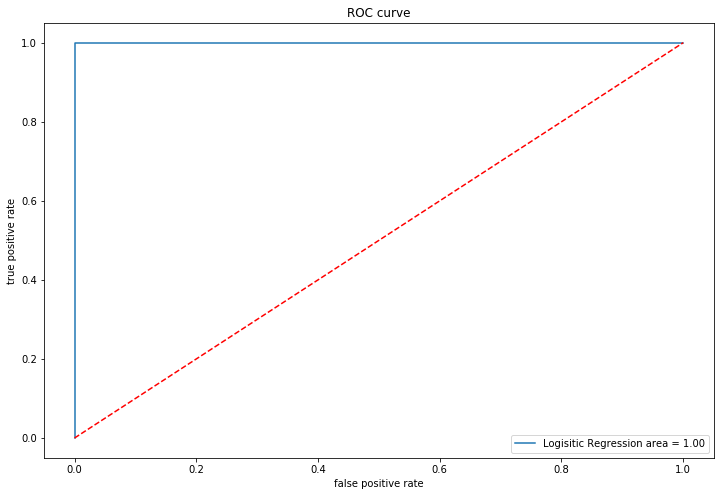

In [47]:
plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# Test Set

In [49]:
pred = best_model.predict(X_test_tfidf)
print(metrics.accuracy_score(y_test,pred))

0.9775280898876404


In [50]:
X_test_tfidf.shape

(89, 1414)

In [51]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[39  1]
 [ 1 48]]


In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        49

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



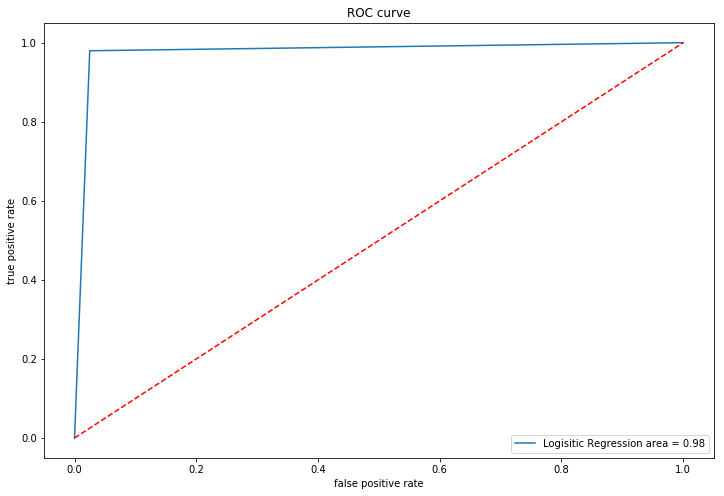

In [53]:
fpr, tpr, _ = roc_curve(y_test, pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, pred.reshape(-1,1))
plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

In [54]:
from sklearn.metrics import fbeta_score

beta_vals = [.1,.5,.9,1,5,10]

print([fbeta_score(y_test,pred, beta=i) for i in beta_vals])

[0.9795918367346939, 0.979591836734694, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939]


# E(i) -> (iii)

In [56]:
lr = LogisticRegression()


c = [pow(10,i) for i in range(-5,6)]
penalty = ['l1']
print("C-",c)

parameters = {'C': c,
             'penalty': penalty,
             'solver': ['liblinear']}


gridcv = GridSearchCV(lr, parameters, cv =5 )

best_model = gridcv.fit(X_train_tfidf,y_train)

print('Best C-:', best_model.best_estimator_.get_params()['C'])

best_model.predict(X_train_tfidf)

C- [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C-: 1000


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Train Set

In [57]:
pred = best_model.predict(X_train_tfidf)
print(metrics.accuracy_score(y_train,pred))

1.0


In [58]:
cm = confusion_matrix(y_train,pred)
print(cm)

[[163   0]
 [  0 196]]


In [59]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       196

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



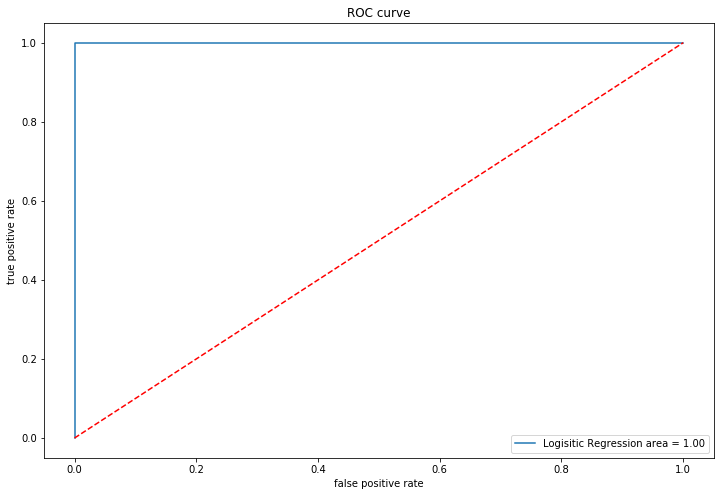

In [60]:
fpr, tpr, _ = roc_curve(y_train, pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_train, pred.reshape(-1,1))


plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()


# Test set

In [61]:
pred = best_model.predict(X_test_tfidf)
print(metrics.accuracy_score(y_test,pred))

0.9662921348314607


In [62]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[40  0]
 [ 3 46]]


In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.94      0.97        49

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



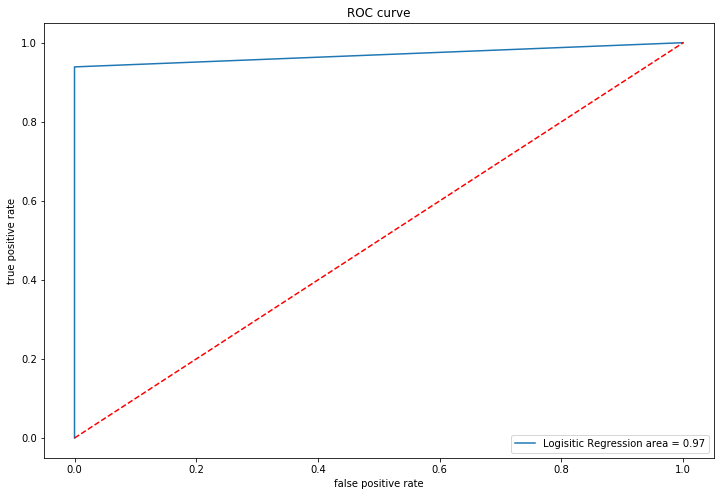

In [64]:
fpr, tpr, _ = roc_curve(y_test, pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, pred.reshape(-1,1))
plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# F(i)

In [68]:
from sklearn.naive_bayes import GaussianNB

# Train Set

In [78]:
gnb = GaussianNB()

gnb.fit(X_train_tfidf,y_train)

GaussianNB()

In [79]:
gnb_pred = gnb.predict(X_train_tfidf)
print(metrics.accuracy_score(y_train,gnb_pred))

0.9972144846796658


In [80]:
cm = confusion_matrix(y_train,gnb_pred)
print(cm)

[[163   0]
 [  1 195]]


In [81]:
print(classification_report(y_train, gnb_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       163
           1       1.00      0.99      1.00       196

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



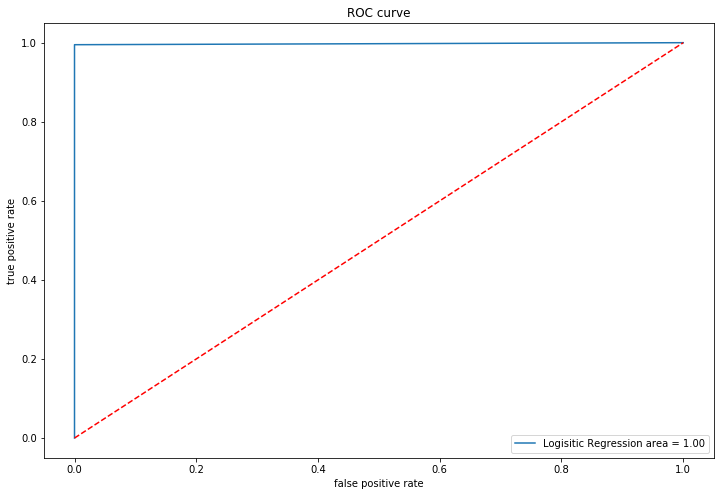

In [82]:
fpr, tpr, _ = roc_curve(y_train, gnb_pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_train, gnb_pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# Test Set

In [83]:
gnb_pred = gnb.predict(X_test_tfidf)
print(metrics.accuracy_score(y_test,gnb_pred))

0.9213483146067416


In [85]:
cm = confusion_matrix(y_test,gnb_pred)
print(cm)

[[34  6]
 [ 1 48]]


In [87]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91        40
           1       0.89      0.98      0.93        49

    accuracy                           0.92        89
   macro avg       0.93      0.91      0.92        89
weighted avg       0.93      0.92      0.92        89



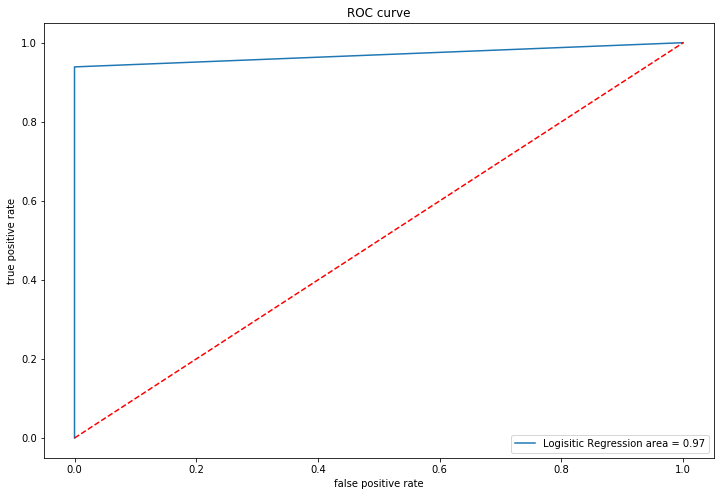

In [88]:
fpr, tpr, _ = roc_curve(y_test, pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, pred.reshape(-1,1))
plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# Extra Credit 

## (G)

In [89]:
from sklearn.naive_bayes import MultinomialNB

# Train Set

In [90]:
clf = MultinomialNB()
clf.fit(X_train_tfidf,y_train)

MultinomialNB()

In [91]:
clf_pred = clf.predict(X_train_tfidf)
print(metrics.accuracy_score(y_train,clf_pred))

0.9777158774373259


In [92]:
cm = confusion_matrix(y_train,clf_pred)
print(cm)

[[156   7]
 [  1 195]]


In [93]:
print(classification_report(y_train, clf_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       163
           1       0.97      0.99      0.98       196

    accuracy                           0.98       359
   macro avg       0.98      0.98      0.98       359
weighted avg       0.98      0.98      0.98       359



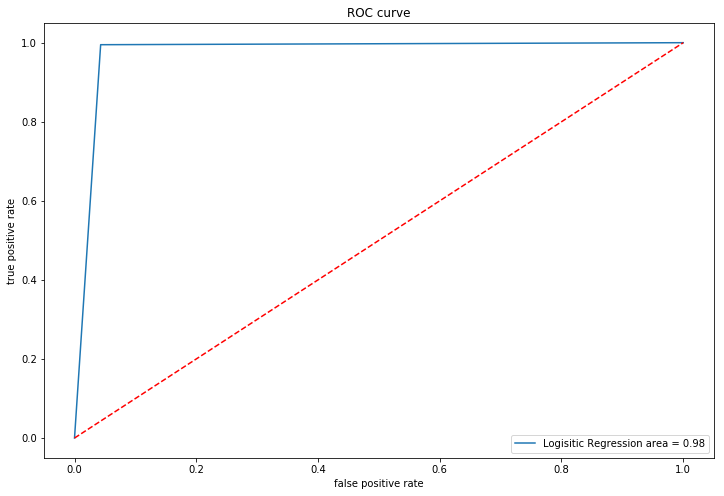

In [94]:
fpr, tpr, _ = roc_curve(y_train, clf_pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_train, clf_pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# Test Set

In [95]:
clf_pred = clf.predict(X_test_tfidf)
print(metrics.accuracy_score(y_test,clf_pred))

0.898876404494382


In [96]:
cm = confusion_matrix(y_test,clf_pred)
print(cm)

[[31  9]
 [ 0 49]]


In [97]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87        40
           1       0.84      1.00      0.92        49

    accuracy                           0.90        89
   macro avg       0.92      0.89      0.89        89
weighted avg       0.91      0.90      0.90        89



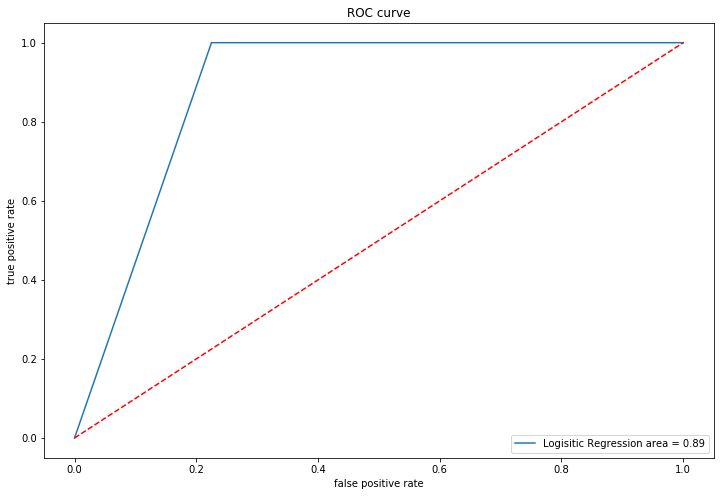

In [98]:
fpr, tpr, _ = roc_curve(y_test, clf_pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, clf_pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

## (H)

In [99]:
from glob import glob
import os

In [112]:
all_dfs = []
all_csvs = []


for i in os.listdir('/Users/zain/Downloads/YouTube-Spam-Collection-v1/'):
    all_dfs.append(i)
for i in all_dfs:
    df_all = pd.read_csv("/Users/zain/Downloads/YouTube-Spam-Collection-v1/"+i)
    all_csvs.append(df_all)

In [115]:
dfs = pd.concat(all_csvs)

In [116]:
all_dfs

['Youtube03-LMFAO.csv',
 'Youtube04-Eminem.csv',
 'Youtube05-Shakira.csv',
 'Youtube02-KatyPerry.csv',
 'Youtube01-Psy.csv']

In [232]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [398]:
import math

index_vals = ['NB-Gaussian','NB-Multinomial','L_1_Reg','L_2_Reg']

precision_vals = []
accuracy_vals = []
f_1_vals = []
recall_vals = []
auc_vals = []


class MyClass:
    def __init__(self, my_dataframe):
        self.my_dataframe = my_dataframe
        self.length = my_dataframe.shape
        self.lenght_0 = len(my_dataframe.loc[(df['CLASS'] == 0)])
        self.lenght_1 = len(my_dataframe.loc[(df['CLASS'] == 1)])
        self.Train_set = pd.concat([my_dataframe.loc[(my_dataframe['CLASS'] == 1)]
                                    [0:math.floor(len(my_dataframe.loc[(df['CLASS'] == 1)]) *.80)],
                                    my_dataframe.loc[(my_dataframe['CLASS'] == 0)]
                                    [0:math.floor(len(my_dataframe.loc[(df['CLASS'] == 0)]) *.80)]])
        
        self.Test_set = pd.concat([my_dataframe.loc[(my_dataframe['CLASS'] == 1)]
                                    [math.floor(len(my_dataframe.loc[(df['CLASS'] == 1)]) *.80):],
                                    my_dataframe.loc[(my_dataframe['CLASS'] == 0)]
                                    [math.floor(len(my_dataframe.loc[(df['CLASS'] == 0)]) *.80):]])
        
    def preview_df(self):
        print(self.Train_set.shape, self.Test_set.shape)
        
    def gaussian_(self):
        vectorizer.fit(self.Train_set['CONTENT'])
        X_train_tfidf = vectorizer.transform(self.Train_set['CONTENT']).toarray()
        X_test_tfidf = vectorizer.transform(self.Test_set['CONTENT']).toarray()
        y_train = self.Train_set['CLASS']
        y_test = self.Test_set['CLASS']
        gnb = GaussianNB()
        gnb.fit(X_train_tfidf,y_train)
        gnb_pred = gnb.predict(X_test_tfidf)
        f_1 = f1_score(y_test,gnb_pred)
        recall = recall_score(y_test,gnb_pred)
        precision = precision_score(y_test,gnb_pred)
        logit_roc_auc = roc_auc_score(y_test, gnb_pred.reshape(-1,1))
        precision_vals.append(precision)
        auc_vals.append(logit_roc_auc)
        recall_vals.append(recall)
        f_1_vals.append(f_1)
        accuracy_vals.append(metrics.accuracy_score(y_test,gnb_pred))
        print("Accuracy_score: ",metrics.accuracy_score(y_test,gnb_pred))
        print("F_1 score: ", f_1)
        print("AUC score: ",logit_roc_auc)
        print("Precision: ", precision)
        print("Recall: ",recall )
        
        
class MyClass_2:
    def __init__(self, my_dataframe):
        self.my_dataframe = my_dataframe
        self.length = my_dataframe.shape
        self.lenght_0 = len(my_dataframe.loc[(df['CLASS'] == 0)])
        self.lenght_1 = len(my_dataframe.loc[(df['CLASS'] == 1)])
        self.Train_set = pd.concat([my_dataframe.loc[(my_dataframe['CLASS'] == 1)]
                                    [0:math.floor(len(my_dataframe.loc[(df['CLASS'] == 1)]) *.80)],
                                    my_dataframe.loc[(my_dataframe['CLASS'] == 0)]
                                    [0:math.floor(len(my_dataframe.loc[(df['CLASS'] == 0)]) *.80)]])
        
        self.Test_set = pd.concat([my_dataframe.loc[(my_dataframe['CLASS'] == 1)]
                                    [math.floor(len(my_dataframe.loc[(df['CLASS'] == 1)]) *.80):],
                                    my_dataframe.loc[(my_dataframe['CLASS'] == 0)]
                                    [math.floor(len(my_dataframe.loc[(df['CLASS'] == 0)]) *.80):]])
        
    def preview_df(self):
        print(self.Train_set.shape, self.Test_set.shape)
        
    def Multinom_(self):
        vectorizer.fit(self.Train_set['CONTENT'])
        X_train_tfidf = vectorizer.transform(self.Train_set['CONTENT']).toarray()
        X_test_tfidf = vectorizer.transform(self.Test_set['CONTENT']).toarray()
        y_train = self.Train_set['CLASS']
        y_test = self.Test_set['CLASS']
        clf = MultinomialNB()
        clf.fit(X_train_tfidf,y_train)
        clf_pred = clf.predict(X_test_tfidf)
        f_1 = f1_score(y_test,clf_pred)
        recall = recall_score(y_test,clf_pred)
        precision = precision_score(y_test,clf_pred)
        logit_roc_auc = roc_auc_score(y_test, clf_pred.reshape(-1,1))
        precision_vals.append(precision)
        auc_vals.append(logit_roc_auc)
        recall_vals.append(recall)
        f_1_vals.append(f_1)
        accuracy_vals.append(metrics.accuracy_score(y_test,clf_pred))
        print("Accuracy_score: ",metrics.accuracy_score(y_test,clf_pred))
        print("F_1 score: ", f_1)
        print("AUC score: ",logit_roc_auc)
        print("Precision: ", precision)
        print("Recall: ",recall )
        
    
    
        
class MyClass_3:
    def __init__(self, my_dataframe):
        self.my_dataframe = my_dataframe
        self.length = my_dataframe.shape
        self.lenght_0 = len(my_dataframe.loc[(df['CLASS'] == 0)])
        self.lenght_1 = len(my_dataframe.loc[(df['CLASS'] == 1)])
        self.Train_set = pd.concat([my_dataframe.loc[(my_dataframe['CLASS'] == 1)]
                                    [0:math.floor(len(my_dataframe.loc[(df['CLASS'] == 1)]) *.80)],
                                    my_dataframe.loc[(my_dataframe['CLASS'] == 0)]
                                    [0:math.floor(len(my_dataframe.loc[(df['CLASS'] == 0)]) *.80)]])
        
        self.Test_set = pd.concat([my_dataframe.loc[(my_dataframe['CLASS'] == 1)]
                                    [math.floor(len(my_dataframe.loc[(df['CLASS'] == 1)]) *.80):],
                                    my_dataframe.loc[(my_dataframe['CLASS'] == 0)]
                                    [math.floor(len(my_dataframe.loc[(df['CLASS'] == 0)]) *.80):]])
        
    def preview_df(self):
        print(self.Train_set.shape, self.Test_set.shape)
        
    def L_1_Reg_(self):
        vectorizer.fit(self.Train_set['CONTENT'])
        X_train_tfidf = vectorizer.transform(self.Train_set['CONTENT']).toarray()
        X_test_tfidf = vectorizer.transform(self.Test_set['CONTENT']).toarray()
        y_train = self.Train_set['CLASS']
        y_test = self.Test_set['CLASS']
        lr = LogisticRegression(max_iter = 1000)
        c = [pow(10,i) for i in range(-5,6)]
        penalty = ['l1']
        parameters = {'C': c,
                     'penalty': penalty,
                     'solver': ['liblinear']}
        gridcv = GridSearchCV(lr, parameters, cv =5 )
        best_model = gridcv.fit(X_train_tfidf,y_train)
        pred = best_model.predict(X_test_tfidf)

        f_1 = f1_score(y_test,pred)
        recall = recall_score(y_test,pred)
        precision = precision_score(y_test,pred)
        logit_roc_auc = roc_auc_score(y_test, pred.reshape(-1,1))
        precision_vals.append(precision)
        auc_vals.append(logit_roc_auc)
        recall_vals.append(recall)
        f_1_vals.append(f_1)
        accuracy_vals.append(metrics.accuracy_score(y_test,pred))
        print("Accuracy_score: ",metrics.accuracy_score(y_test,pred))
        print("F_1 score: ", f_1)
        print("AUC score: ",logit_roc_auc)
        print("Precision: ", precision)
        print("Recall: ",recall )
        
        
class MyClass_4:
    def __init__(self, my_dataframe):
        self.my_dataframe = my_dataframe
        self.length = my_dataframe.shape
        self.lenght_0 = len(my_dataframe.loc[(df['CLASS'] == 0)])
        self.lenght_1 = len(my_dataframe.loc[(df['CLASS'] == 1)])
        self.Train_set = pd.concat([my_dataframe.loc[(my_dataframe['CLASS'] == 1)]
                                    [0:math.floor(len(my_dataframe.loc[(df['CLASS'] == 1)]) *.80)],
                                    my_dataframe.loc[(my_dataframe['CLASS'] == 0)]
                                    [0:math.floor(len(my_dataframe.loc[(df['CLASS'] == 0)]) *.80)]])
        
        self.Test_set = pd.concat([my_dataframe.loc[(my_dataframe['CLASS'] == 1)]
                                    [math.floor(len(my_dataframe.loc[(df['CLASS'] == 1)]) *.80):],
                                    my_dataframe.loc[(my_dataframe['CLASS'] == 0)]
                                    [math.floor(len(my_dataframe.loc[(df['CLASS'] == 0)]) *.80):]])
        
    def preview_df(self):
        print(self.Train_set.shape, self.Test_set.shape)
        
    def L_2_Reg_(self):
        vectorizer.fit(self.Train_set['CONTENT'])
        X_train_tfidf = vectorizer.transform(self.Train_set['CONTENT']).toarray()
        X_test_tfidf = vectorizer.transform(self.Test_set['CONTENT']).toarray()
        y_train = self.Train_set['CLASS']
        y_test = self.Test_set['CLASS']
        lr = LogisticRegression(max_iter = 1000)
        c = [pow(10,i) for i in range(-5,6)]
        penalty = ['l2']
        parameters = {'C': c,
                     'penalty': penalty,
                     'solver': ['lbfgs']}
        gridcv = GridSearchCV(lr, parameters, cv =5 )
        best_model = gridcv.fit(X_train_tfidf,y_train)
        pred = best_model.predict(X_test_tfidf)

        f_1 = f1_score(y_test,pred)
        recall = recall_score(y_test,pred)
        precision = precision_score(y_test,pred)
        logit_roc_auc = roc_auc_score(y_test, pred.reshape(-1,1))
        precision_vals.append(precision)
        auc_vals.append(logit_roc_auc)
        recall_vals.append(recall)
        f_1_vals.append(f_1)
        accuracy_vals.append(metrics.accuracy_score(y_test,pred))
        print("Accuracy_score: ",metrics.accuracy_score(y_test,pred))
        print("F_1 score: ", f_1)
        print("AUC score: ",logit_roc_auc)
        print("Precision: ", precision)
        print("Recall: ",recall )

In [399]:


for i in all_dfs:
    Runner_up = pd.read_csv("/Users/zain/Downloads/YouTube-Spam-Collection-v1/"+i)
    first = MyClass(Runner_up)
    first_ = first.gaussian_()
    second = MyClass_2(Runner_up)
    second_ = second.Multinom_()
    third = MyClass_3(Runner_up)
    third_ = third.L_1_Reg_()
    fourth = MyClass_4(Runner_up)
    fourth_ = fourth.L_2_Reg_()

    full_df = pd.DataFrame(precision_vals, columns = ['Precision'], index = index_vals)
    full_df['Accuracy_score'] = accuracy_vals
    full_df['F_1_Score'] = f_1_vals
    full_df['Recall_Score'] = recall_vals
    full_df['AUC_Score'] = auc_vals
    full_df = full_df.style.highlight_max(color = 'lightGreen', axis = 0)
    start = '-'
    end = '.csv'
    caption = (i.split(start))[1].split(end)[0]
    print("\n\n\n Table below is for: \t",caption,)
    display(full_df)
    
    precision_vals.clear()
    accuracy_vals.clear()
    f_1_vals.clear() 
    recall_vals.clear()
    auc_vals.clear() 

Accuracy_score:  0.8977272727272727
F_1 score:  0.896551724137931
AUC score:  0.8984496124031007
Precision:  0.9285714285714286
Recall:  0.8666666666666667
Accuracy_score:  0.875
F_1 score:  0.8842105263157894
AUC score:  0.8736434108527131
Precision:  0.84
Recall:  0.9333333333333333
Accuracy_score:  0.9772727272727273
F_1 score:  0.9777777777777777
AUC score:  0.9772609819121447
Precision:  0.9777777777777777
Recall:  0.9777777777777777
Accuracy_score:  0.9431818181818182
F_1 score:  0.9438202247191012
AUC score:  0.9434108527131783
Precision:  0.9545454545454546
Recall:  0.9333333333333333



 Table below is for: 	 LMFAO


,Precision,Accuracy_score,F_1_Score,Recall_Score,AUC_Score
NB-Gaussian,0.928571,0.897727,0.896552,0.866667,0.898450
NB-Multinomial,0.840000,0.875000,0.884211,0.933333,0.873643
L_1_Reg,0.977778,0.977273,0.977778,0.977778,0.977261
L_2_Reg,0.954545,0.943182,0.943820,0.933333,0.943411


Accuracy_score:  0.9222222222222223
F_1 score:  0.9320388349514563
AUC score:  0.9166251866600298
Precision:  0.8888888888888888
Recall:  0.9795918367346939
Accuracy_score:  0.9
F_1 score:  0.9158878504672897
AUC score:  0.8902439024390244
Precision:  0.8448275862068966
Recall:  1.0


/Users/zain/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy_score:  0.9555555555555556
F_1 score:  0.9574468085106383
AUC score:  0.9591836734693877
Precision:  1.0
Recall:  0.9183673469387755
Accuracy_score:  0.9777777777777777
F_1 score:  0.9795918367346939
AUC score:  0.9776007964161274
Precision:  0.9795918367346939
Recall:  0.9795918367346939



 Table below is for: 	 Eminem


,Precision,Accuracy_score,F_1_Score,Recall_Score,AUC_Score
NB-Gaussian,0.888889,0.922222,0.932039,0.979592,0.916625
NB-Multinomial,0.844828,0.900000,0.915888,1.000000,0.890244
L_1_Reg,1.000000,0.955556,0.957447,0.918367,0.959184
L_2_Reg,0.979592,0.977778,0.979592,0.979592,0.977601


Accuracy_score:  0.8666666666666667
F_1 score:  0.6153846153846153
AUC score:  0.9253731343283582
Precision:  0.4444444444444444
Recall:  1.0
Accuracy_score:  0.8933333333333333
F_1 score:  0.6666666666666666
AUC score:  0.9402985074626865
Precision:  0.5
Recall:  1.0
Accuracy_score:  0.92
F_1 score:  0.7000000000000001
AUC score:  0.9001865671641791
Precision:  0.5833333333333334
Recall:  0.875
Accuracy_score:  0.9333333333333333
F_1 score:  0.7368421052631579
AUC score:  0.9076492537313433
Precision:  0.6363636363636364
Recall:  0.875



 Table below is for: 	 Shakira


,Precision,Accuracy_score,F_1_Score,Recall_Score,AUC_Score
NB-Gaussian,0.444444,0.866667,0.615385,1.000000,0.925373
NB-Multinomial,0.500000,0.893333,0.666667,1.000000,0.940299
L_1_Reg,0.583333,0.920000,0.700000,0.875000,0.900187
L_2_Reg,0.636364,0.933333,0.736842,0.875000,0.907649


Accuracy_score:  0.7142857142857143
F_1 score:  0.6
AUC score:  0.8181818181818181
Precision:  0.42857142857142855
Recall:  1.0
Accuracy_score:  0.8571428571428571
F_1 score:  0.7499999999999999
AUC score:  0.9090909090909091
Precision:  0.6
Recall:  1.0


/Users/zain/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy_score:  0.9857142857142858
F_1 score:  0.967741935483871
AUC score:  0.9909090909090909
Precision:  0.9375
Recall:  1.0
Accuracy_score:  0.9571428571428572
F_1 score:  0.9032258064516129
AUC score:  0.9484848484848485
Precision:  0.875
Recall:  0.9333333333333333



 Table below is for: 	 KatyPerry


,Precision,Accuracy_score,F_1_Score,Recall_Score,AUC_Score
NB-Gaussian,0.428571,0.714286,0.600000,1.000000,0.818182
NB-Multinomial,0.600000,0.857143,0.750000,1.000000,0.909091
L_1_Reg,0.937500,0.985714,0.967742,1.000000,0.990909
L_2_Reg,0.875000,0.957143,0.903226,0.933333,0.948485


Accuracy_score:  0.8285714285714286
F_1 score:  0.7142857142857143
AUC score:  0.890909090909091
Precision:  0.5555555555555556
Recall:  1.0
Accuracy_score:  0.8857142857142857
F_1 score:  0.7894736842105263
AUC score:  0.9272727272727272
Precision:  0.6521739130434783
Recall:  1.0


/Users/zain/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/zain/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/zain/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy_score:  0.9428571428571428
F_1 score:  0.8823529411764706
AUC score:  0.9636363636363636
Precision:  0.7894736842105263
Recall:  1.0
Accuracy_score:  0.9285714285714286
F_1 score:  0.8571428571428571
AUC score:  0.9545454545454545
Precision:  0.75
Recall:  1.0



 Table below is for: 	 Psy


,Precision,Accuracy_score,F_1_Score,Recall_Score,AUC_Score
NB-Gaussian,0.555556,0.828571,0.714286,1.000000,0.890909
NB-Multinomial,0.652174,0.885714,0.789474,1.000000,0.927273
L_1_Reg,0.789474,0.942857,0.882353,1.000000,0.963636
L_2_Reg,0.750000,0.928571,0.857143,1.000000,0.954545
